In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("smsspamcollection.tsv",sep ="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [4]:
df.isnull()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

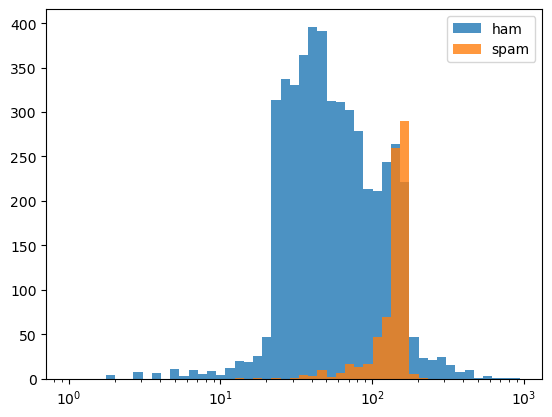

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.xscale("log")
bins = 1.15**(np.arange(0,50))
plt.hist(df[df["label"]=="ham"]["length"],bins=bins,alpha = 0.8)
plt.hist(df[df["label"]=="spam"]["length"],bins = bins, alpha = 0.8)
plt.legend(("ham","spam"))
plt.show()

In [10]:
# When a message is spam is longer than ham message. The graph show that.

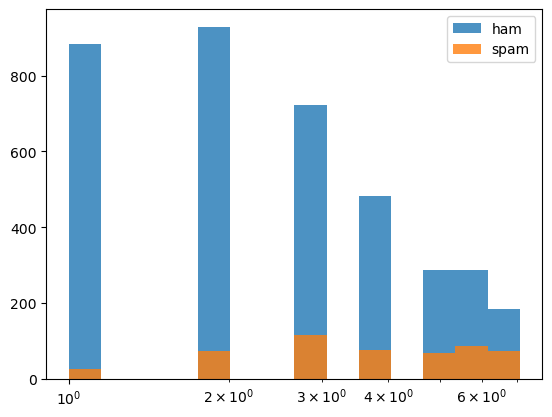

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.xscale("log")
bins = 1.15**(np.arange(0,15))
plt.hist(df[df["label"]=="ham"]["punct"],bins=bins,alpha = 0.8)
plt.hist(df[df["label"]=="spam"]["punct"],bins = bins, alpha = 0.8)
plt.legend(("ham","spam"))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# X feature data
X = df[["length","punct"]]
# y is our label
y = df["label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
X_train.shape

(3900, 2)

In [15]:
X_train.head()

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3


In [16]:
X_test.shape

(1672, 2)

In [17]:
X_test.head()

,length,punct
3245,147,14
944,116,1
1044,102,3
2484,45,0
812,112,4


In [18]:
y_test.shape

(1672,)

In [19]:
y_test.head()

3245    ham
944     ham
1044    ham
2484    ham
812     ham
Name: label, dtype: object

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model = LogisticRegression(solver = "lbfgs")

In [22]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [23]:
from sklearn import metrics

In [24]:
predictions = lr_model.predict(X_test)

In [25]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [26]:
metrics.confusion_matrix(y_test,predictions)

array([[1404,   44],
       [ 219,    5]], dtype=int64)

In [27]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index = ["ham","spam"],columns = ["ham","spam"])
df

,ham,spam
ham,1404,44
spam,219,5


In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [29]:
#detecting ham is good detecting spam is worse

In [30]:
print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [33]:
from sklearn.naive_bayes import MultinomialNB


In [34]:
nb_model = MultinomialNB

nb_model.fit(X_train,y_train)
predictions = np_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

TypeError: _BaseDiscreteNB.fit() missing 1 required positional argument: 'y'

In [36]:
from sklearn.svm import SVC


In [38]:

svc_model = SVC(gamma = "auto")
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672



In [40]:
print(metrics.accuracy_score(y_test,predictions))

0.8827751196172249
